In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IND_DATA = pd.read_csv("C:/Users/vinay m v/Downloads/JioSphere/IndusInd Bank Stock Price History.csv")

In [3]:
IND_DATA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/17/2025,677.40,705.00,706.45,675.00,22.35M,0.75%
1,03/13/2025,672.35,690.00,706.90,667.65,31.59M,-1.80%
2,03/12/2025,684.70,630.00,697.65,606.00,108.68M,4.38%
3,03/11/2025,655.95,810.45,810.45,649.00,101.08M,-27.16%
4,03/10/2025,900.50,895.00,913.35,881.10,16.01M,-3.87%


In [4]:
IND_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4951 non-null   object
 1   Price     4951 non-null   object
 2   Open      4951 non-null   object
 3   High      4951 non-null   object
 4   Low       4951 non-null   object
 5   Vol.      4950 non-null   object
 6   Change %  4951 non-null   object
dtypes: object(7)
memory usage: 270.9+ KB


In [5]:
IND_DATA['Date']=pd.to_datetime(IND_DATA['Date'], format="%m/%d/%Y")

In [6]:
for col in ['Price', 'Open', 'High', 'Low']:
    IND_DATA[col] = IND_DATA[col].str.replace(',', '').astype(float)

In [7]:
# Convert 'Change %' to float (remove '%' sign)
IND_DATA['Change %'] = IND_DATA['Change %'].str.replace('%', '').astype(float)

In [8]:
IND_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4951 non-null   datetime64[ns]
 1   Price     4951 non-null   float64       
 2   Open      4951 non-null   float64       
 3   High      4951 non-null   float64       
 4   Low       4951 non-null   float64       
 5   Vol.      4950 non-null   object        
 6   Change %  4951 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 270.9+ KB


In [10]:
# Improved function to convert volume properly
def convert_volume(vol):
    if isinstance(vol, str):
        vol = vol.replace(',', '')  # Remove commas if present
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1e6  # Convert Millions
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1e3  # Convert Thousands
    return float(vol) if vol else None

# Apply the conversion function to 'Vol.' column
IND_DATA['Vol.'] = IND_DATA['Vol.'].apply(convert_volume)

# Check the updated data types
IND_DATA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4951 non-null   datetime64[ns]
 1   Price     4951 non-null   float64       
 2   Open      4951 non-null   float64       
 3   High      4951 non-null   float64       
 4   Low       4951 non-null   float64       
 5   Vol.      4950 non-null   float64       
 6   Change %  4951 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 270.9 KB


In [12]:
# Display summary statistics
IND_DATA.describe()


,Date,Price,Open,High,Low,Vol.,Change %
count,4951,4951.000000,4951.000000,4951.000000,4951.000000,4.950000e+03,4951.000000
mean,2015-03-21 18:43:33.290244352,722.448425,723.325177,732.984953,712.353777,3.118295e+06,0.095033
min,2005-04-01 00:00:00,27.400000,26.150000,28.600000,26.150000,1.466000e+04,-27.160000
25%,2010-03-31 12:00:00,177.150000,177.425000,181.350000,171.600000,7.133850e+05,-1.190000
50%,2015-03-19 00:00:00,608.300000,610.000000,621.500000,595.100000,1.390000e+06,0.020000
75%,2020-03-21 12:00:00,1185.100000,1187.650000,1203.525000,1172.725000,3.070000e+06,1.340000
max,2025-03-17 00:00:00,2023.050000,2033.100000,2038.000000,2003.450000,1.086800e+08,44.670000
std,NaN,570.418615,571.024261,576.518725,564.418515,6.216789e+06,2.918826


In [13]:
# Calculate mean, median, and mode for key numerical columns
central_tendency = {
    "Mean Price": IND_DATA["Price"].mean(),
    "Median Price": IND_DATA["Price"].median(),
    "Mode Price": IND_DATA["Price"].mode()[0],
    
    "Mean Open": IND_DATA["Open"].mean(),
    "Median Open": IND_DATA["Open"].median(),
    "Mode Open": IND_DATA["Open"].mode()[0],
    
    "Mean High": IND_DATA["High"].mean(),
    "Median High": IND_DATA["High"].median(),
    "Mode High": IND_DATA["High"].mode()[0],
    
    "Mean Low": IND_DATA["Low"].mean(),
    "Median Low": IND_DATA["Low"].median(),
    "Mode Low": IND_DATA["Low"].mode()[0],
}

central_tendency


{'Mean Price': 722.4484245606948,
 'Median Price': 608.3,
 'Mode Price': 44.75,
 'Mean Open': 723.3251767319733,
 'Median Open': 610.0,
 'Mode Open': 53.0,
 'Mean High': 732.9849525348415,
 'Median High': 621.5,
 'Mode High': 54.9,
 'Mean Low': 712.3537770147444,
 'Median Low': 595.1,
 'Mode Low': 51.5}

In [15]:
# Calculate measures of dispersion
dispersion_measures = {
    "Standard Deviation (Price)": IND_DATA["Price"].std(),
    "Variance (Price)": IND_DATA["Price"].var(),
    "Range (Price)": IND_DATA["Price"].max() - IND_DATA["Price"].min(),
    
    "Standard Deviation (Open)": IND_DATA["Open"].std(),
    "Variance (Open)": IND_DATA["Open"].var(),
    "Range (Open)": IND_DATA["Open"].max() - IND_DATA["Open"].min(),
    
    "Standard Deviation (High)": IND_DATA["High"].std(),
    "Variance (High)": IND_DATA["High"].var(),
    "Range (High)": IND_DATA["High"].max() - IND_DATA["High"].min(),
    
    "Standard Deviation (Low)": IND_DATA["Low"].std(),
    "Variance (Low)": IND_DATA["Low"].var(),
    "Range (Low)": IND_DATA["Low"].max() - IND_DATA["Low"].min(),
}

dispersion_measures


{'Standard Deviation (Price)': 570.4186149065096,
 'Variance (Price)': 325377.3962318609,
 'Range (Price)': 1995.6499999999999,
 'Standard Deviation (Open)': 571.0242612598148,
 'Variance (Open)': 326068.70694731723,
 'Range (Open)': 2006.9499999999998,
 'Standard Deviation (High)': 576.5187249578833,
 'Variance (High)': 332373.8402270634,
 'Range (High)': 2009.4,
 'Standard Deviation (Low)': 564.4185153040734,
 'Variance (Low)': 318568.26041805453,
 'Range (Low)': 1977.3}

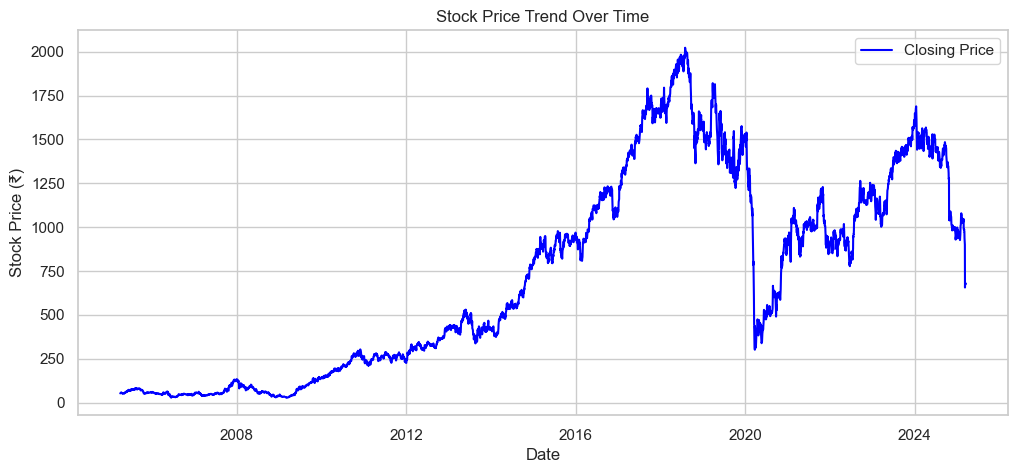

In [16]:

import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Plot stock price trends over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=IND_DATA["Date"], y=IND_DATA["Price"], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Stock Price Trend Over Time")
plt.legend()
plt.show()


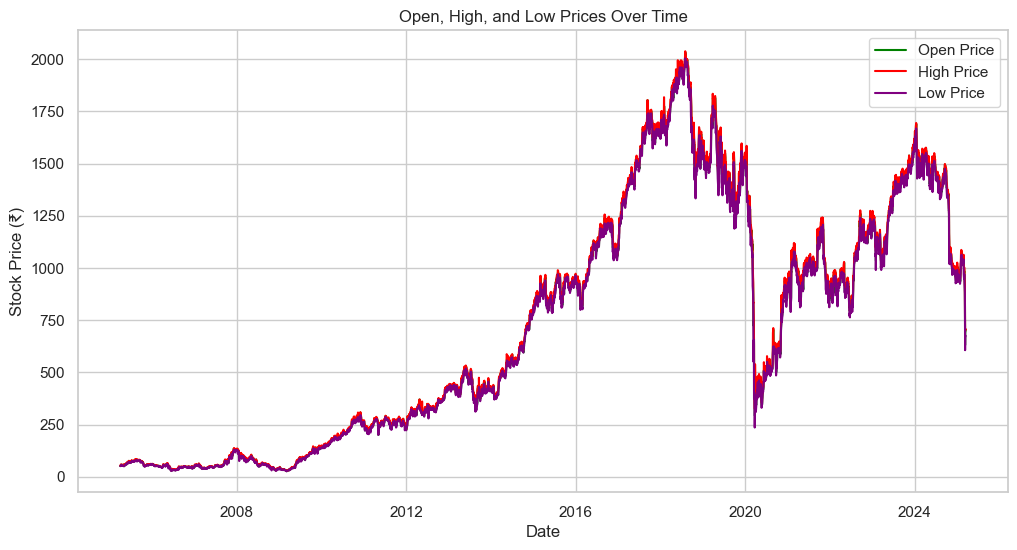

In [18]:
# Create subplots for Open, High, Low prices over time
plt.figure(figsize=(12, 6))

sns.lineplot(x=IND_DATA["Date"], y=IND_DATA["Open"], label="Open Price", color='green')
sns.lineplot(x=IND_DATA["Date"], y=IND_DATA["High"], label="High Price", color='red')
sns.lineplot(x=IND_DATA["Date"], y=IND_DATA["Low"], label="Low Price", color='purple')

plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Open, High, and Low Prices Over Time")
plt.legend()
plt.show()


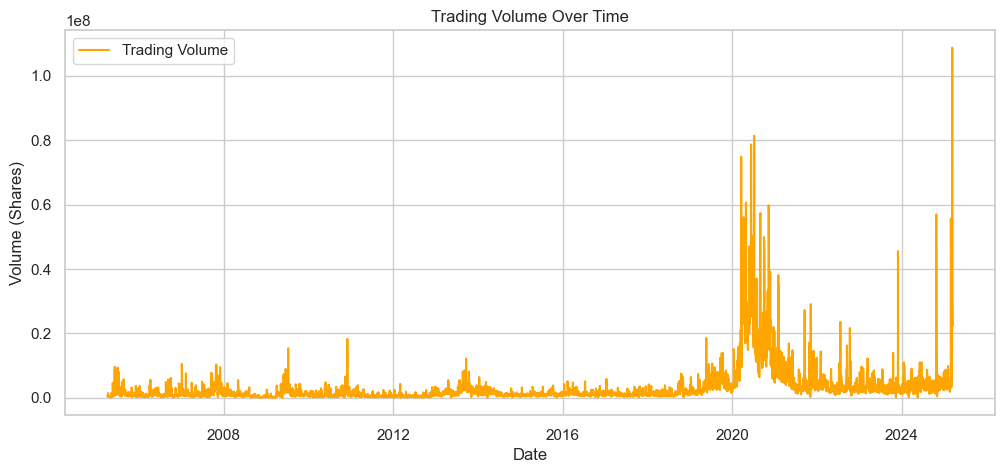

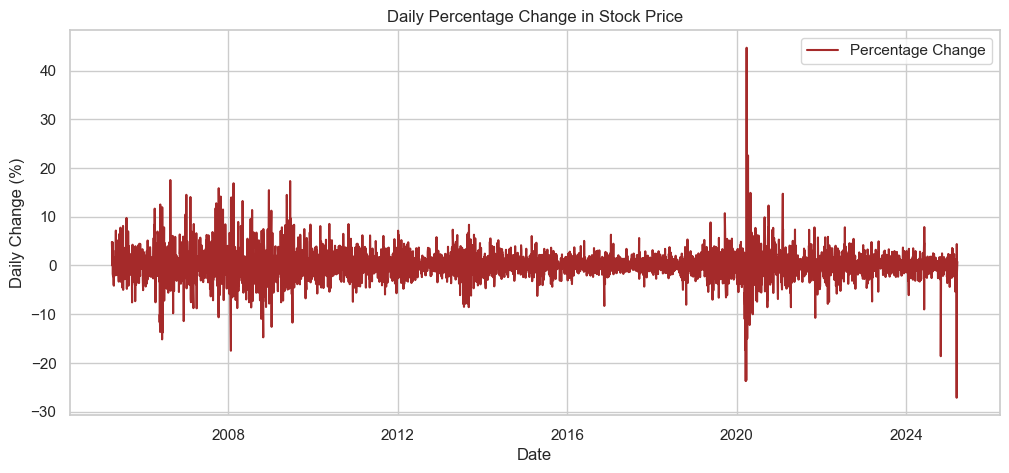

In [19]:
# Plot trading volume over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=IND_DATA["Date"], y=IND_DATA["Vol."], label="Trading Volume", color='orange')
plt.xlabel("Date")
plt.ylabel("Volume (Shares)")
plt.title("Trading Volume Over Time")
plt.legend()
plt.show()

# Plot percentage change over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=IND_DATA["Date"], y=IND_DATA["Change %"], label="Percentage Change", color='brown')
plt.xlabel("Date")
plt.ylabel("Daily Change (%)")
plt.title("Daily Percentage Change in Stock Price")
plt.legend()
plt.show()


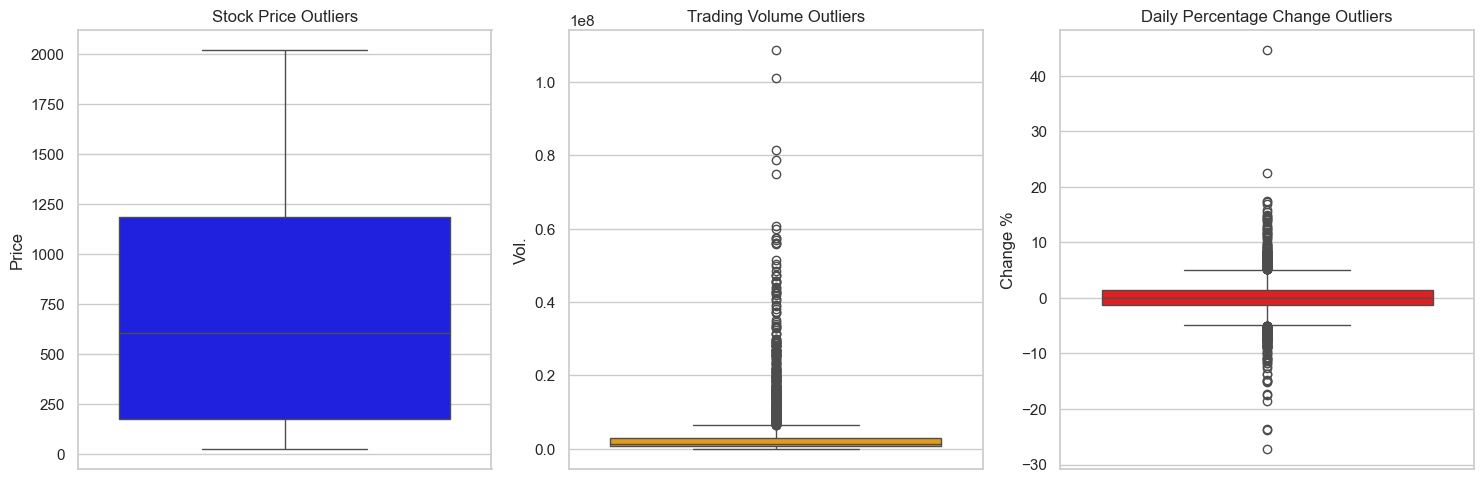

In [20]:
# Boxplots to visualize outliers in Price, Volume, and Change %

plt.figure(figsize=(15, 5))

# Boxplot for Stock Price
plt.subplot(1, 3, 1)
sns.boxplot(y=IND_DATA["Price"], color='blue')
plt.title("Stock Price Outliers")

# Boxplot for Trading Volume
plt.subplot(1, 3, 2)
sns.boxplot(y=IND_DATA["Vol."], color='orange')
plt.title("Trading Volume Outliers")

# Boxplot for Daily Percentage Change
plt.subplot(1, 3, 3)
sns.boxplot(y=IND_DATA["Change %"], color='red')
plt.title("Daily Percentage Change Outliers")

plt.tight_layout()
plt.show()


In [22]:
# Check for missing values
missing_values = IND_DATA.isnull().sum()
missing_values


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
X = IND_DATA[["Open", "High", "Low", "Vol.", "Change %"]]
y = IND_DATA["Price"]

In [ ]:
# Handle the missing value by filling it with the median volume
IND_DATA["Vol."].fillna(IND_DATA["Vol."].median(), inplace=True)


In [29]:
IND_DATA.fillna({"Vol.":0}, inplace = True)

In [30]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Apply Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
# Predict on test data
y_pred = model.predict(X_test)

In [33]:
# Model coefficients
model.coef_, model.intercept_

(array([-4.39349007e-01,  7.88060519e-01,  6.50190652e-01, -1.19592333e-07,
         7.50325453e-01]),
 -0.3039304182360638)

In [34]:
from sklearn.metrics import mean_absolute_error


In [35]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae

3.920010264770219

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

mae_rf, mse_rf


(3.7030882946518977, 38.3423984180124)

In [38]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MAE and MSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Return evaluation metrics
mae_rf, mse_rf


(3.7030882946518977, 38.3423984180124)

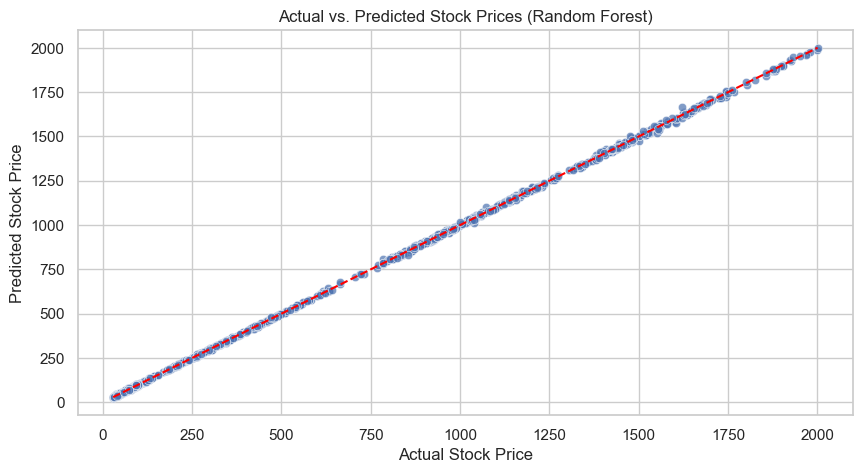

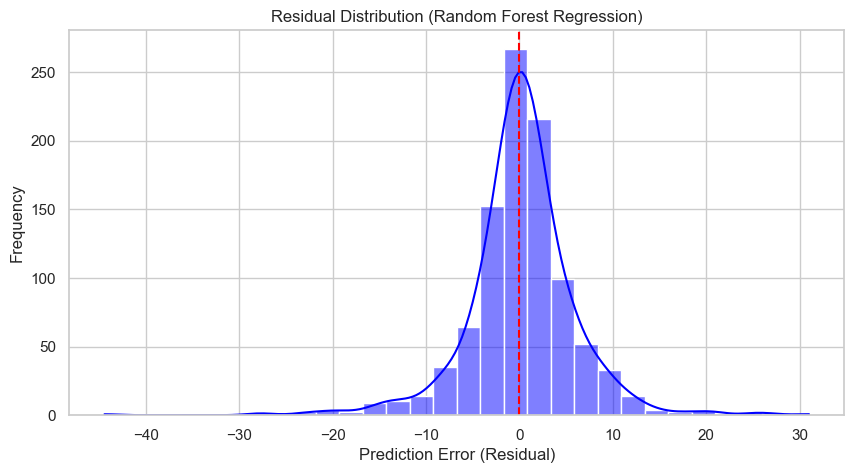

In [40]:

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Reference Line
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs. Predicted Stock Prices (Random Forest)")
plt.show()

# Residual Plot: Prediction Errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(0, color="red", linestyle="--")  # Zero error line
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest Regression)")
plt.show()


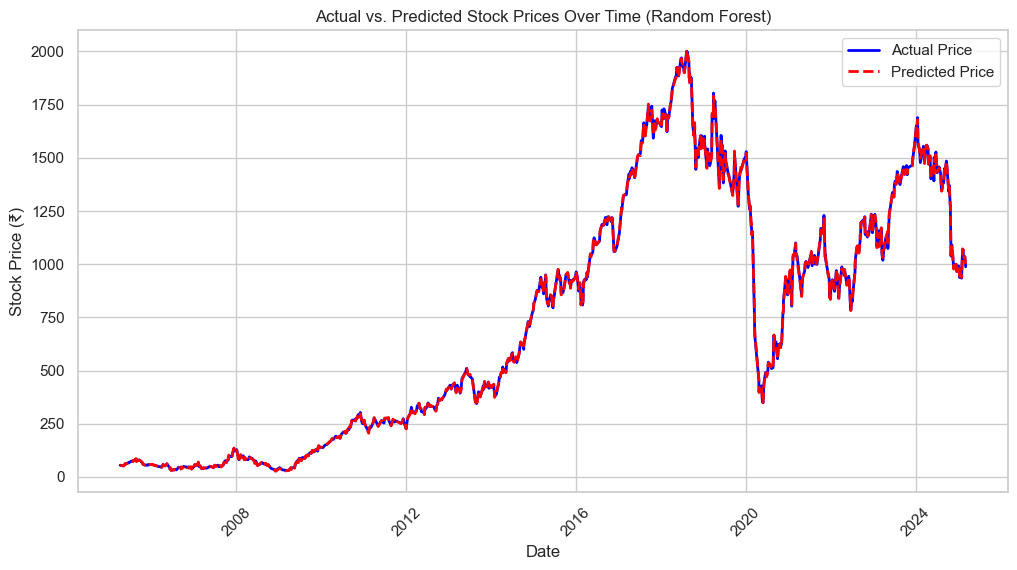

In [44]:
# Add date column back to test set for time-based visualization
df_sorted = IND_DATA.sort_values(by="Date")  # Ensure chronological order
X_test_sorted = X_test.copy()
X_test_sorted["Date"] = IND_DATA.loc[X_test.index, "Date"]  # Retrieve corresponding dates

# Sort test set by date
X_test_sorted = X_test_sorted.sort_values(by="Date")
y_test_sorted = y_test.loc[X_test_sorted.index]
y_pred_sorted = model.predict(X_test_sorted.drop(columns=["Date"]))

# Plot actual vs. predicted prices over time
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted["Date"], y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(X_test_sorted["Date"], y_pred_sorted, label="Predicted Price", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Actual vs. Predicted Stock Prices Over Time (Random Forest)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [50]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
IND_DATA['MA_5'] = IND_DATA['Price'].rolling(window=5).mean()
IND_DATA['MA_20'] = IND_DATA['Price'].rolling(window=20).mean()


In [54]:
for lag in range(1, 6):
    IND_DATA[f'Close_Lag_{lag}'] = IND_DATA['Price'].shift(lag)


In [59]:
features = ['Open', 'High', 'Low', 'Vol.', 'MA_5', 'MA_20', 'Change %'] + [f'Close_Lag_{lag}' for lag in range(1, 6)]
target = 'Price'


In [60]:
X = IND_DATA[features]
y = IND_DATA[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [61]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
# Predictions
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [64]:
# Evaluate Models
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

XGBoost MAE: 3.35388154261769
XGBoost RMSE: 4.165271071697006
Random Forest MAE: 2.3823062563067627
Random Forest RMSE: 2.9991459543256886


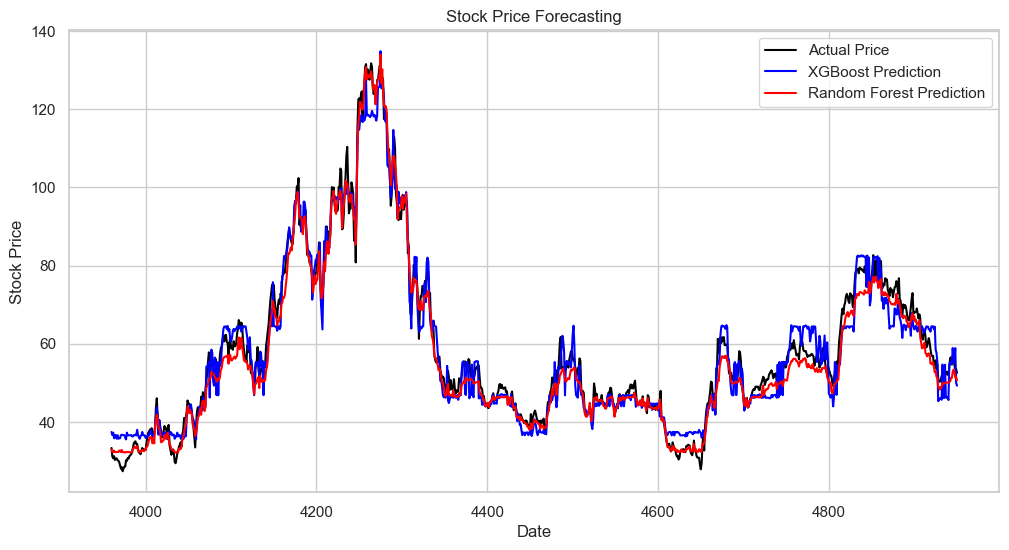

In [69]:
# Plot Predictions
plt.figure(figsize=(12, 6))
X_test_sorted["Date"] = IND_DATA.loc[X_test.index, "Date"]
plt.plot(IND_DATA.index[-len(y_test):], y_test, label='Actual Price', color='black')
plt.plot(IND_DATA.index[-len(y_test):], xgb_pred, label='XGBoost Prediction', color='blue')
plt.plot(IND_DATA.index[-len(y_test):], rf_pred, label='Random Forest Prediction', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecasting')
plt.show()